# MNIST Convolutional Neural Network
We are going to build a Convolutional Neural Network to classify handwritten digits from MNIST dataset. 
This will just be a simple CNN with 2 convolutional layers and 2 hidden layers. We are later going to study more accurate sequential models. 

For this notebook we are going to use **TensorFlow** with **Keras**.

In [1]:
import tensorflow as tf 
# We don't really need to import TensorFlow here since it's handled by Keras, 
# but we do it in order to output the version we are using.

In [2]:
tf.__version__

'0.12.1'

We are using TensorFlow-GPU 0.12.1 on Python 3.5.2, running on Windows 10 with Cuda 8.0.
We have 3 machines with the same environment and 3 different GPUs, respectively with 384, 1024 and 1664 Cuda cores.

## Imports

In [3]:
from util import Util
u = Util()

import numpy as np
# Explicit random seed for reproducibility
np.random.seed(1337)  

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

Using TensorFlow backend.


In [5]:
from keras.datasets import mnist

## Definitions

In [6]:
batch_size = 128
nb_classes = 10
nb_epoch = 15

In [7]:
# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

## Data load

In [8]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

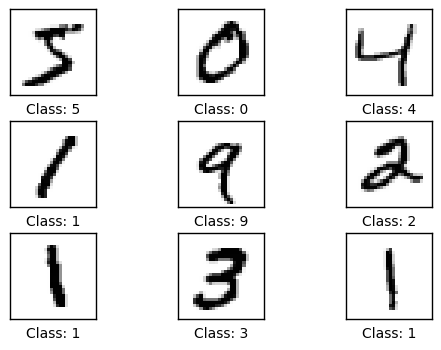

In [9]:
u.plot_images(X_train[0:9], y_train[0:9])

In [10]:
if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [11]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [12]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

## Model definition

In [13]:
model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])


## Training and evaluation

In [14]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 12s - loss: 0.3724 - acc: 0.8858 - val_loss: 0.0906 - val_acc: 0.9715
Epoch 2/15
60000/60000 [==============================] - 11s - loss: 0.1369 - acc: 0.9591 - val_loss: 0.0622 - val_acc: 0.9810
Epoch 3/15
60000/60000 [==============================] - 11s - loss: 0.1045 - acc: 0.9694 - val_loss: 0.0511 - val_acc: 0.9836
Epoch 4/15
60000/60000 [==============================] - 11s - loss: 0.0892 - acc: 0.9738 - val_loss: 0.0434 - val_acc: 0.9862
Epoch 5/15
60000/60000 [==============================] - 11s - loss: 0.0771 - acc: 0.9769 - val_loss: 0.0398 - val_acc: 0.9869
Epoch 6/15
60000/60000 [==============================] - 10s - loss: 0.0698 - acc: 0.9792 - val_loss: 0.0359 - val_acc: 0.9888
Epoch 7/15
60000/60000 [==============================] - 11s - loss: 0.0653 - acc: 0.9799 - val_loss: 0.0365 - val_acc: 0.9877
Epoch 8/15
60000/60000 [==============================

## Inspecting the result

In [15]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

 9920/10000 [============================>.] - ETA: 0s

### Examples of correct predictions

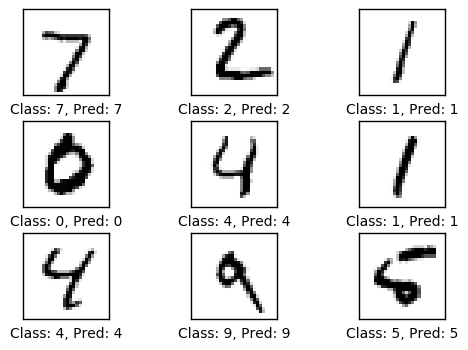

In [16]:
u.plot_images(X_test[correct_indices[:9]], y_test[correct_indices[:9]], 
              predicted_classes[correct_indices[:9]])

### Examples of incorrect predictions

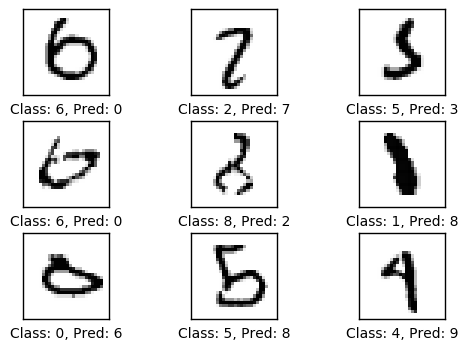

In [17]:
u.plot_images(X_test[incorrect_indices[:9]], y_test[incorrect_indices[:9]], 
              predicted_classes[incorrect_indices[:9]])

## Results
After 15 epochs running in about 10 seconds each (on our average GPU), the model reaches about 99% accuracy on the test set. 
The record for MNIST is 0.21% error, so we can still do better, and we will try in the next notebook. 